This exploratory data analysis follows along to Youtuber Data Science with Onur for practice and familiarizing myself with data analysis tools in Python from [Salary Prediction Data Science Project Tutorial](https://www.youtube.com/watch?v=RI8yBHJSfSw). 

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [5]:
data = pd.read_excel("Employees.xlsx")

In [6]:
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [8]:
data.shape

(689, 15)

In [9]:
data.isna().sum()

No                0
First Name        0
Last Name         0
Gender            0
Start Date        0
Years             0
Department        0
Country           0
Center            0
Monthly Salary    0
Annual Salary     0
Job Rate          0
Sick Leaves       0
Unpaid Leaves     0
Overtime Hours    0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.head(3)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192


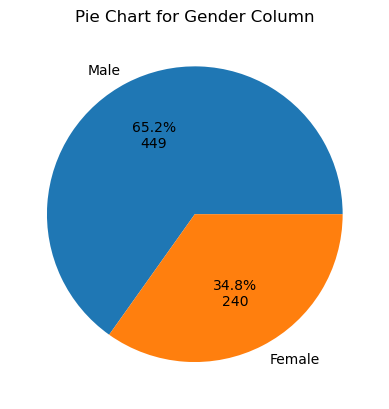

In [26]:
def pctFun(values):
    total = data["Gender"].value_counts().values.sum()
    return '{:.1f}%\n{:.0f}'.format(values, total*values/100)

plt.pie(data["Gender"].value_counts().sort_values(ascending=False), labels=data["Gender"].value_counts().index, autopct=pctFun)
plt.title("Pie Chart for Gender Column")
plt.show()

In [28]:
data.head(2)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198


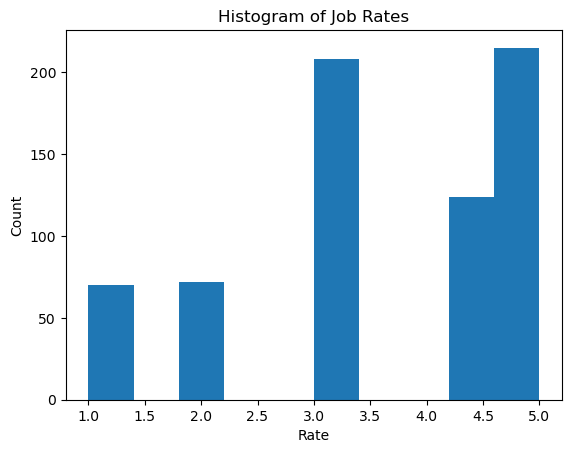

In [30]:
plt.hist(data["Job Rate"])
plt.title("Histogram of Job Rates")
plt.xlabel("Rate")
plt.ylabel("Count")
plt.show()

In [31]:
data["Job Rate"].describe()

count    689.000000
mean       3.586357
std        1.350125
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Job Rate, dtype: float64

In [32]:
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [34]:
data.groupby("Department")["Annual Salary"].mean().sort_values(ascending=False)

Department
Human Resources                30670.285714
Environmental Compliance       30097.846154
Training                       28341.000000
Facilities/Engineering         27423.310345
Major Mfg Projects             26908.500000
IT                             25374.300000
Research/Development           25183.200000
Quality Assurance              25007.104478
Green Building                 24994.500000
Marketing                      24733.500000
Quality Control                24647.460674
Professional Training Group    24485.142857
Creative                       24135.789474
Manufacturing                  24055.628571
Environmental Health/Safety    24005.333333
Product Development            23576.470588
Sales                          23477.400000
Account Management             23246.000000
Manufacturing Admin            23052.000000
Research Center                22644.000000
Name: Annual Salary, dtype: float64

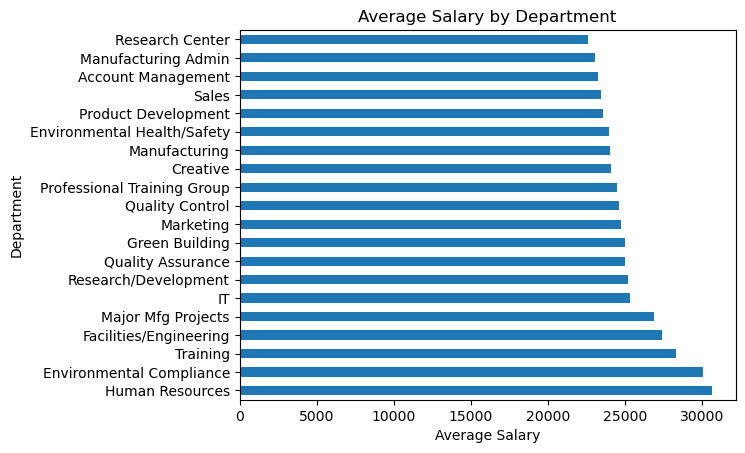

In [43]:
data.groupby("Department")["Annual Salary"].mean().sort_values(ascending=False).plot(kind="barh")
plt.title("Average Salary by Department")
plt.xlabel("Average Salary")
plt.show()

In [44]:
data.groupby("Center")["Monthly Salary"].mean().sort_values(ascending=False)

Center
East     2274.021277
West     2068.672269
North    2064.811594
Main     2054.776892
South    1981.153846
Name: Monthly Salary, dtype: float64

In [45]:
data["Country"].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

In [48]:
data.groupby("Country")["Job Rate"].mean().sort_values(ascending=False)

Country
Saudi Arabia            3.783333
United Arab Emirates    3.625000
Egypt                   3.547493
Syria                   3.481132
Lebanon                 3.272727
Name: Job Rate, dtype: float64

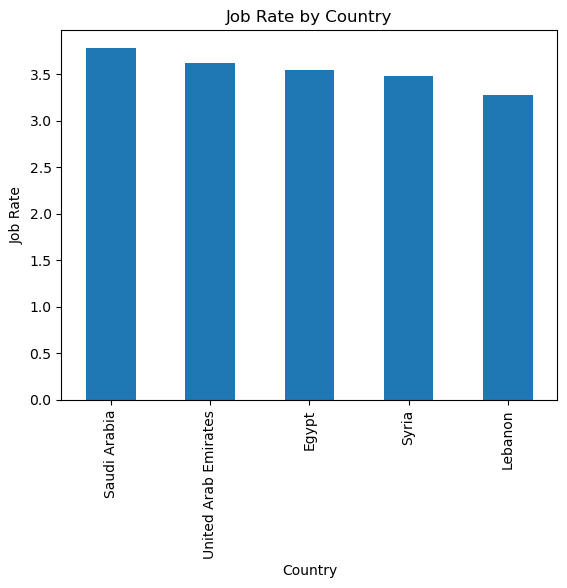

In [49]:
data.groupby("Country")["Job Rate"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Job Rate by Country")
plt.xlabel("Country")
plt.ylabel("Job Rate")
plt.show()

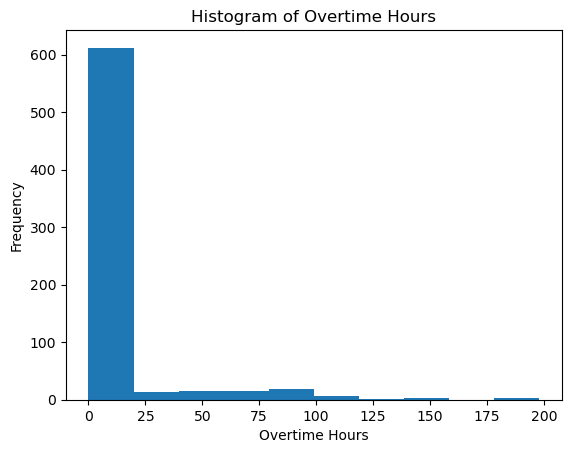

In [50]:
plt.hist(data["Overtime Hours"])
plt.title("Histogram of Overtime Hours")
plt.xlabel("Overtime Hours")
plt.ylabel("Frequency")
plt.show()

Here a better visualization could be utilized if the overtime hours column is to be further explored. One possibility is understanding overtime hours by department.

In [51]:
data["Overtime Hours"].describe()

count    689.000000
mean      13.702467
std       25.692049
min        0.000000
25%        3.000000
50%        7.000000
75%       10.000000
max      198.000000
Name: Overtime Hours, dtype: float64

In [52]:
data["Annual Salary"].describe()

count      689.000000
mean     24818.420900
std       9159.470878
min       8436.000000
25%      17232.000000
50%      24924.000000
75%      32184.000000
max      41400.000000
Name: Annual Salary, dtype: float64

Now for basic regression practice. Looking at Years and Job Rate columns to predict Annual Salary.

In [53]:
data.columns

Index(['No', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

In [54]:
X = data[["Years", "Job Rate"]]
y = data["Annual Salary"]

Now, train and fit data to create a linear regression model

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [59]:
print(len(y_train))
print(len(X_train))

551
551


In [60]:
print(len(X_test))
print(len(y_test))

138
138


No need for any sort of scaling as X_train and y_train and X_test and y_test are same values respectively

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predslr = lr.predict(X_test)

In [69]:
mean_absolute_error(predslr,y_test)

7513.330154756637